# Project for Pacmann Probability Course

## Import Libraries

In [2]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
from math import factorial
from functuser import *
from numerize.numerize import numerize

## Import Data

In [3]:
insurance_data = pd.read_csv('./data/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Descriptive Statistics Analysis

### Customer Segment by Age

In [4]:
# Mean
age_mean = insurance_data['age'].mean()
print_format(age_mean, 2)

39.21


### Smoker Age by Sex

In [5]:
smoker = insurance_data.loc[insurance_data['smoker'] == 'yes']

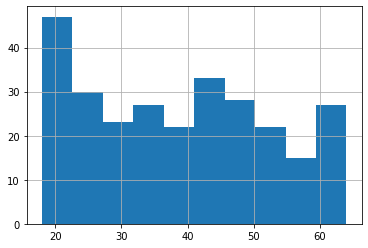

In [6]:
smoker['age'].hist();

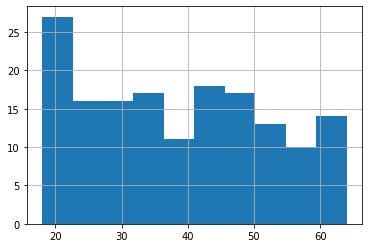

In [7]:
(smoker[smoker['sex'] == 'male'])['age'].hist();

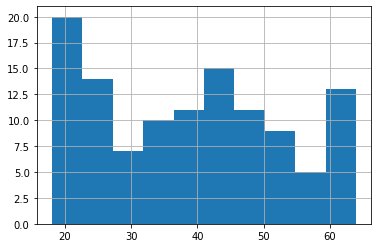

In [8]:
(smoker[smoker['sex'] == 'female'])['age'].hist();

#### Male

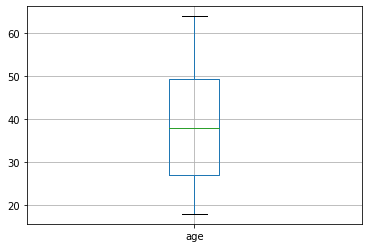

In [9]:
male_smoker_age = (insurance_data.loc[(insurance_data['smoker'] == 'yes')&(insurance_data['sex'] == 'male')])
male_smoker_age.boxplot(column='age');

#### Female

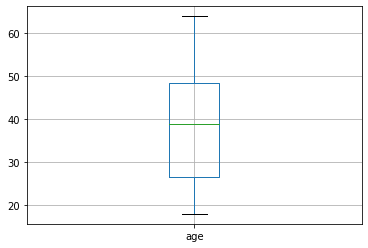

In [10]:
female_smoker_age = (insurance_data.loc[(insurance_data['smoker'] == 'yes')&(insurance_data['sex'] == 'female')])
female_smoker_age.boxplot(column='age');

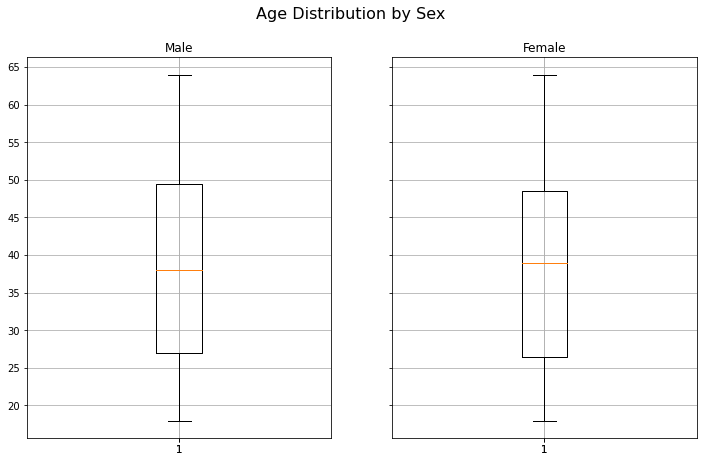

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)
male_smoker = smoker[smoker['sex'] == 'male']  
female_smoker = smoker[smoker['sex'] == 'female']  

ax1.boxplot(male_smoker['age'])
ax2.boxplot(female_smoker['age'])

ax1.grid(visible=True)
ax2.grid(visible=True)

ax1.set(title="Male")
ax2.set(title="Female")
plt.suptitle("Age Distribution by Sex", fontsize=16)
ax1.title.set_size(12)
ax2.title.set_size(12)

tick_spacing = 5

ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.show();

In [12]:
smoker[smoker['sex'] == 'male']['age']

14      27
19      30
29      31
30      22
34      28
        ..
1301    62
1303    43
1304    42
1307    32
1321    62
Name: age, Length: 159, dtype: int64

### BMI

#### Smoker BMI Mean 

In [13]:
smokerBMI_mean = (
    insurance_data
    .groupby(['smoker'])
    .mean()
    ['bmi'] #
    )[1] # 1 = yes, 0 = not
print_format(smokerBMI_mean, 3)

30.708


#### Non-smoker BMI Mean

In [14]:
no_smokerBMI_mean = (
    insurance_data
    .groupby(['smoker'])
    .mean()
    ['bmi'] #
    )[0] # 1 = yes, 0 = not
print_format(no_smokerBMI_mean, 3)

30.652


### Variance of Charges

### Smoker

In [15]:
smoker_charges_var = (
    insurance_data
    .loc[insurance_data['smoker'] == 'yes']
    ['charges']
    .var()
    )
print_format(smoker_charges_var, 3) 

133207311.206


In [16]:
print(numerize(smoker_charges_var))

133.21M


#### Non-smoker Variance

In [17]:
# non smoker
non_smoker_charges_var = (
    insurance_data
    .loc[insurance_data['smoker'] == 'no']
    ['charges']
    .var()
)
print_format(non_smoker_charges_var, 3)

35925420.496


In [18]:
print(numerize(non_smoker_charges_var))

35.93M


### Charges by Sex and Age 

In [19]:
# male and female smoker are already present
male_no_smoker = insurance_data.loc[(insurance_data['smoker'] == 'no')&(insurance_data['sex'] == 'male')]
female_no_smoker = insurance_data.loc[(insurance_data['smoker'] == 'no')&(insurance_data['sex'] == 'female')]

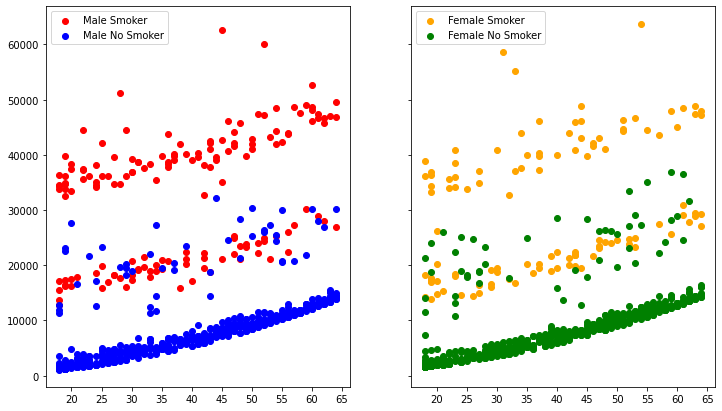

In [20]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

# cat: sex, dimension: age, charges
ax1.scatter(male_smoker['age'], male_smoker['charges'], c='red', label='Male Smoker')
ax2.scatter(female_smoker['age'], female_smoker['charges'], c='orange', label='Female Smoker')
ax1.scatter(male_no_smoker['age'], male_no_smoker['charges'], c='blue', label='Male No Smoker')
ax2.scatter(female_no_smoker['age'], female_no_smoker['charges'], c='green', label='Female No Smoker')

tick_spacing = 5

ax1.legend()
ax2.legend()

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.show();

### Charges by BMI and Sex for Age > 5

In [21]:
male_smoker_bmi25 = male_smoker.loc[male_smoker['bmi'] > 25]
male_no_smoker_bmi25 = male_no_smoker.loc[male_no_smoker['bmi'] > 25]
female_no_smoker_bmi25 = female_no_smoker.loc[female_no_smoker['bmi'] > 25]
female_smoker_bmi25 = female_no_smoker.loc[female_no_smoker['bmi'] > 25]

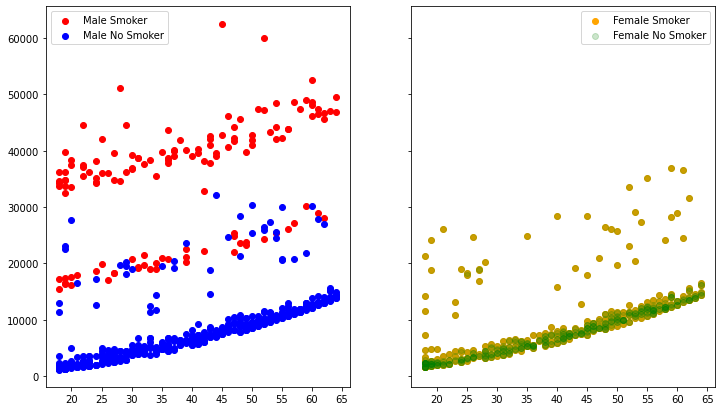

In [22]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

# cat: sex, dimension: age, charges
ax1.scatter(male_smoker_bmi25['age'], male_smoker_bmi25['charges'], c='red', label='Male Smoker')
ax2.scatter(female_smoker_bmi25['age'], female_smoker_bmi25['charges'], c='orange', label='Female Smoker')
ax1.scatter(male_no_smoker_bmi25['age'], male_no_smoker_bmi25['charges'], c='blue', label='Male No Smoker')
ax2.scatter(female_no_smoker_bmi25['age'], female_no_smoker_bmi25['charges'], c='green', label='Female No Smoker', alpha=0.2)

tick_spacing = 5

ax1.legend()
ax2.legend()

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.show();

### Comparing BMI by Sex

In [23]:
male1 = insurance_data.loc[insurance_data['sex'] == 'male']
female1 = insurance_data.loc[insurance_data['sex'] == 'female']

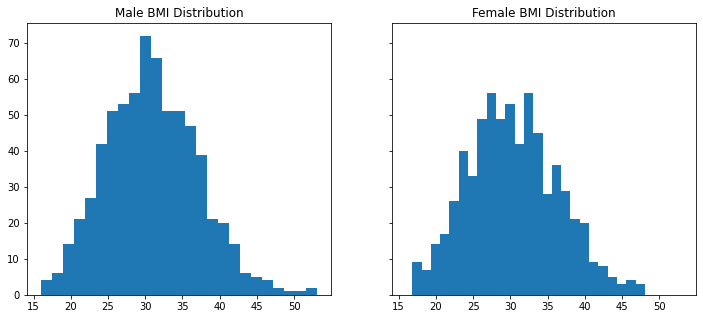

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
ax1.hist(male1['bmi'], bins=25)
ax2.hist(female1['bmi'], bins=25)

ax1.set(title='Male BMI Distribution')
ax2.set(title='Female BMI Distribution')

plt.show();

### Comparing BMI by Smoker Status

In [25]:
no_smoker = insurance_data.loc[insurance_data['smoker'] == 'no']

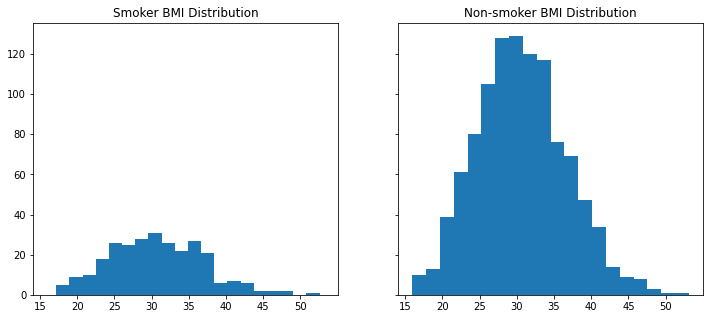

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
ax1.hist(smoker['bmi'], bins=20)
ax2.hist(no_smoker['bmi'], bins=20)

ax1.set(title='Smoker BMI Distribution')
ax2.set(title='Non-smoker BMI Distribution')

plt.show();

## Categorical Variable Analysis (PMF)

#### Top Charges by Sex

In [27]:
top_charges_sex = insurance_data.groupby(['sex'])['charges'].max().reset_index()
top_charges_sex

,sex,charges
0,female,63770.42801
1,male,62592.87309


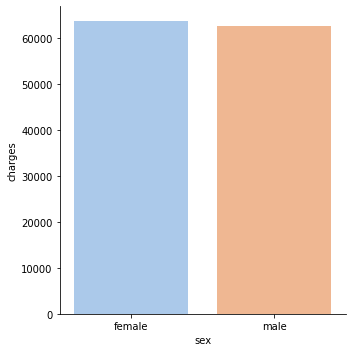

In [28]:
# plot
p = sns.catplot(data=top_charges_sex, x="sex", y="charges", palette="pastel", kind="bar")

plt.show();

#### Probability Distribution of Charges in Each Region 

In [29]:
# get charges by region
charges_region = insurance_data.groupby(['region'])['charges'].count().reset_index()
charges_region

,region,charges
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


In [30]:
# get probability for each region charges
charges_region['probability'] = charges_region['charges']/charges_region['charges'].sum() 
charges_region

,region,charges,probability
0,northeast,324,0.242152
1,northwest,325,0.242900
2,southeast,364,0.272048
3,southwest,325,0.242900


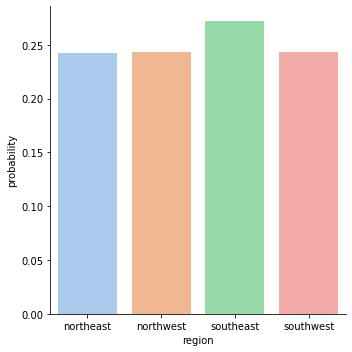

In [31]:
# plot
sns.catplot(data=charges_region, x="region", y="probability", palette="pastel", kind="bar")
plt.show();

#### Distribution of Smokers and Non Smokers in each Region

In [32]:
yn_smoker_region = pd.DataFrame(insurance_data.groupby(['region', 'smoker']).count()['charges'])
yn_smoker_region['percentage'] = (yn_smoker_region['charges']*100)/yn_smoker_region['charges'].sum()
yn_smoker_region

charges  percentage
region    smoker                     
northeast no          257   19.207773
          yes          67    5.007474
northwest no          267   19.955157
          yes          58    4.334828
southeast no          273   20.403587
          yes          91    6.801196
southwest no          267   19.955157
          yes          58    4.334828

#### Probability of a Smoker is a Female

In [33]:
prob_female = (insurance_data['sex'] == 'female')
prob_male = (insurance_data['sex'] == 'male')
prob_smoker = (insurance_data['smoker'] == 'yes')

In [34]:
female_given_smoker = conditional(prob_female, given=prob_smoker)
print_format(female_given_smoker, 2)

0.42


#### Probability of a Smoker is a Male

In [35]:
male_given_smoker = conditional(prob_male, given=prob_smoker)
print_format(male_given_smoker, 2)

0.58


#### Distribution of Charges in Each Region by Age

In [36]:
pd.DataFrame(insurance_data.groupby(['age', 'region']).mean()['charges'])

charges
age region                 
18  northeast   7558.732497
    southeast   6677.555986
19  northwest   9479.636524
    southeast  35570.314200
    southwest   7543.201624
...                     ...
63  southwest  25327.514667
64  northeast  14944.022862
    northwest  20971.302894
    southeast  26134.965188
    southwest  27669.870200

[185 rows x 1 columns]

In [37]:
southeast_charges = insurance_data.loc[insurance_data['region'] == 'southeast']
southwest_charges = insurance_data.loc[insurance_data['region'] == 'southwest']
northeast_charges = insurance_data.loc[insurance_data['region'] == 'northeast']
northwest_charges = insurance_data.loc[insurance_data['region'] == 'northwest']

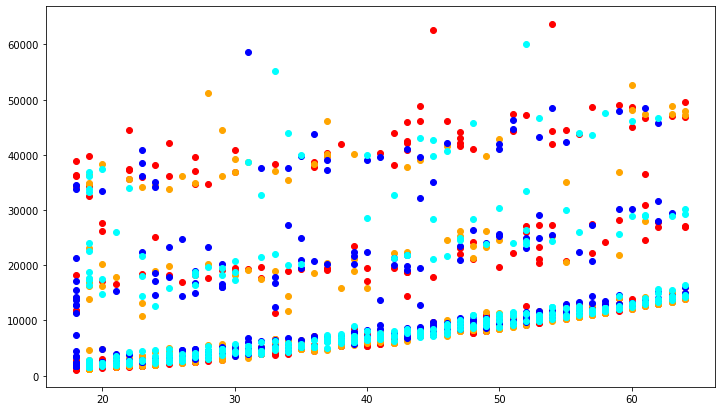

In [38]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(southeast_charges['age'], southeast_charges['charges'], c='red', label='Southeast')
ax.scatter(southwest_charges['age'], southwest_charges['charges'], c='orange', label='Southwest')
ax.scatter(northeast_charges['age'], northeast_charges['charges'], c='blue', label='Northeast')
ax.scatter(northwest_charges['age'], northwest_charges['charges'], c='cyan', label='Northwest')
plt.show();

### Continous Variable Analysis

#### Probability of Charge by BMI

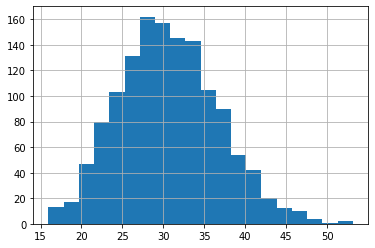

In [58]:
(insurance_data['bmi']).hist(bins=20);

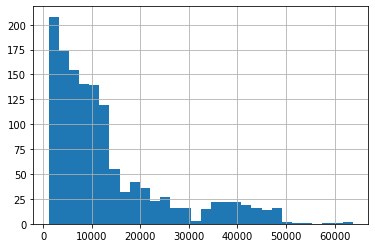

In [77]:
(insurance_data['charges']).hist(bins=30);

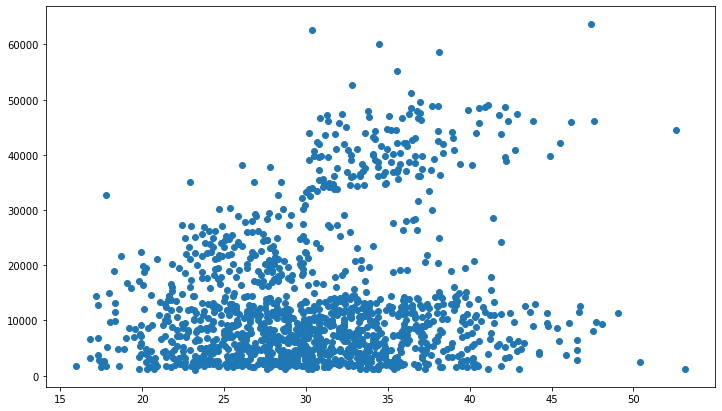

In [40]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(insurance_data['bmi'], insurance_data['charges'])
plt.show();

#### Probability of a Smoker with BMI > 25 Getting Charge > 16,7K

In [63]:
charge16_7 = (insurance_data['charges'] > 16_700)
bmi_m25 = (insurance_data['bmi'] > 25)

In [65]:
smoker_bmi_m25_get_charge16_7 = conditional((prob_smoker & bmi_m25), given=charge16_7)
print_format(smoker_bmi_m25_get_charge16_7, 3)

0.644


#### Probability of Random Person Getting Charge > 16,7K is a Smoker

In [66]:
charge16_7_is_smoker = conditional(charge16_7, given=prob_smoker)
print_format(charge16_7_is_smoker, 3)

0.927


#### COMPARING

#### Probability of a Person with BMI > 25 Getting Charge > 16,7K

In [67]:
bmi_m25_charge16_7 = conditional(charge16_7, given=bmi_m25)
print_format(bmi_m25_charge16_7, 3)

0.259


#### Probability of a Person with BMI < 25 Getting Charge > 16,7K

In [69]:
bmi_l25 = (insurance_data['bmi'] < 25)

In [70]:
bmi_l25_charge16_7 = conditional(charge16_7, given=bmi_l25)
print_format(bmi_l25_charge16_7, 3)

0.208


Person with BMI > 25 is slighly more likely to get charges > 16,7K

#### COMPARING

#### Probability of a Smoker with BMI > 25 Getting Charge > 16,7K

In [74]:
smokerBMI_m25_charge16_7 = conditional(charge16_7, given=(prob_smoker & bmi_m25))
print_format(smokerBMI_m25_charge16_7, 3)

0.982


#### Probability of a Non-smoker with BMI > 25 Getting Charge > 16,7K

In [75]:
nonSmokerBMI_l25_charge16_7 = conditional(charge16_7, given=(prob_smoker & bmi_l25))
print_format(nonSmokerBMI_l25_charge16_7, 3)

0.709


A Smoker with BMI > 25 is more likely to get charged > 16,7K

1. Gender mana yang memiliki tagihan paling tinggi?
2. Distribusi peluang tagihan di tiap-tiap region
3. Apakah setiap region memiliki proporsi data banyak orang yang sama?
4. Mana yang lebih tinggi proporsi perokok atau non perokok?
5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
7. Bagaimana bentuk distribusi tagihan dari tiap-tiap region?